## import libraly

In [40]:
from scipy.signal import filtfilt, kaiserord, firwin, freqz, lfilter
from scipy import stats, signal
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
from numpy import cos, sin, pi, absolute, arange
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

## read CSV

In [41]:
dt=0.01543
fs=1/dt
data = pd.read_csv('/Users/Asus TUF/Desktop/EMG2.csv')
sensor_data = data[['data2']]    #อ่านข้อมูลที่หัวคอลัมชื่อ data2
sensor_data = np.array(sensor_data)
sensor_data = np.squeeze(sensor_data, axis=1) #ลดไดเมนชั่นของเอร
time = np.arange(0,93.798,dt)

In [42]:
print("shape data:",sensor_data.shape)
print(sensor_data)
print("shape time:",time.shape)
print(time)

shape data: (6079,)
[-0.07419355 -0.02258064 -0.17096774 ... -0.02258064 -0.30645161
  0.21612903]
shape time: (6079,)
[0.000000e+00 1.543000e-02 3.086000e-02 ... 9.375268e+01 9.376811e+01
 9.378354e+01]


## signal plot

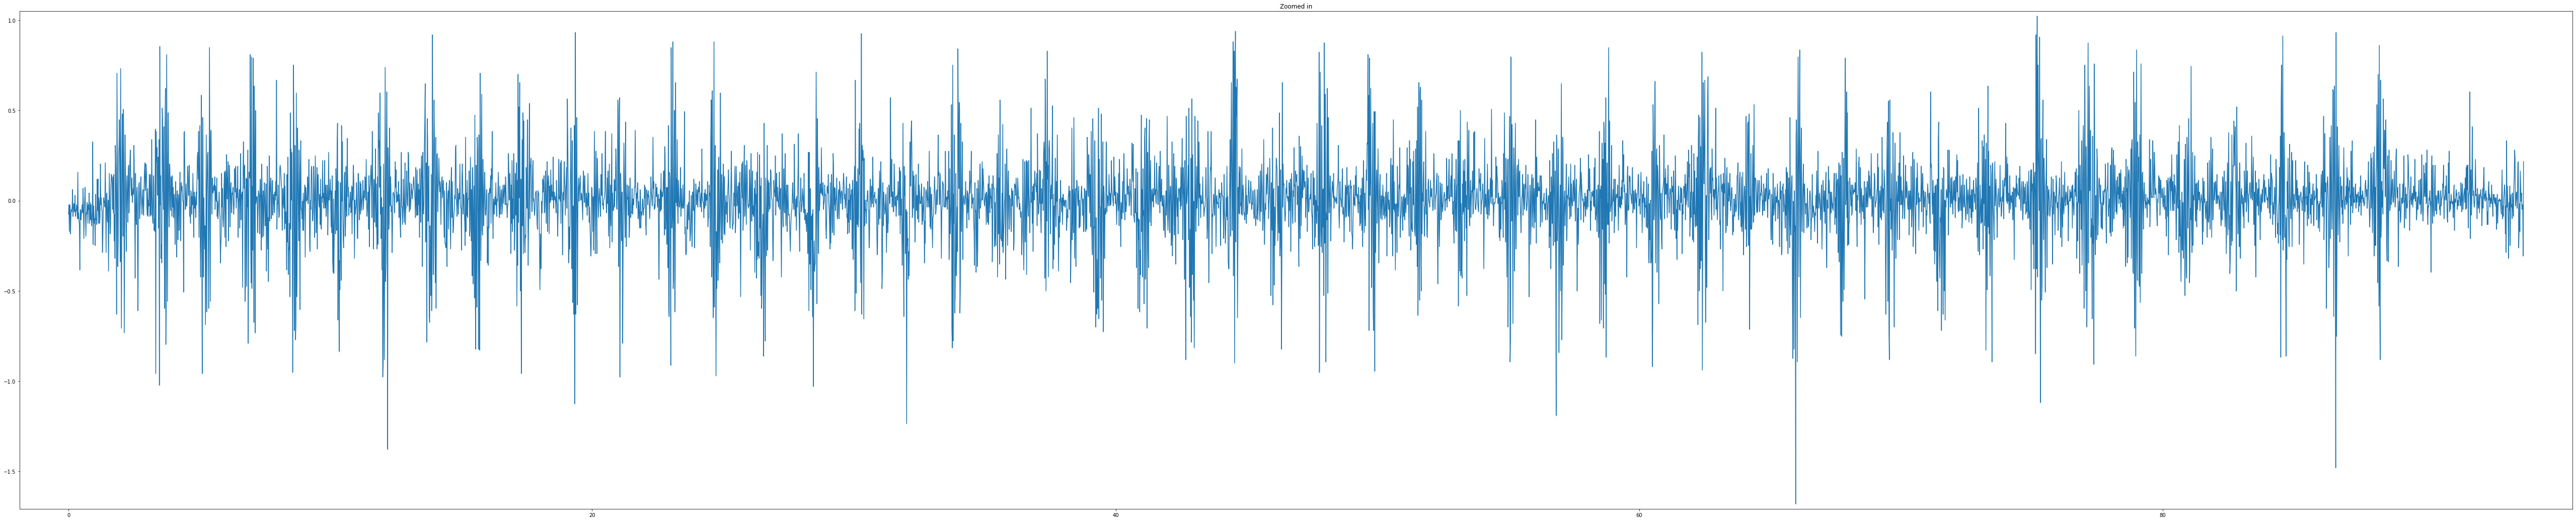

In [43]:
fig, ax2 = plt.subplots(1, 1, figsize=(200,40)) #กำหนดขนาด figure
ax2 = plt.subplot(222)
ax2.margins(x=0.02, y=0.01)   # Values in (-0.5, 0.0) zooms in to center
ax2.plot(time, sensor_data)
ax2.set_title('Zoomed in')

plt.show()

## FFT

In [44]:
n = len(time) 
f_fourier = np.fft.fft(sensor_data,n) # แปลง fft 

In [45]:
f_fourier

array([ -8.22903223-1.77635684e-15j,  12.12961775+3.25999289e+01j,
        22.54535419+8.90639991e-01j, ..., -15.54270258-1.44963596e+01j,
        22.54535419-8.90639991e-01j,  12.12961775-3.25999289e+01j])

In [46]:
PSD = f_fourier * np.conj(f_fourier)/n # คูณคอนจูเกต

In [47]:
PSD

array([0.01113949+0.j, 0.19902665+0.j, 0.08374506+0.j, ...,
       0.07430828+0.j, 0.08374506+0.j, 0.19902665+0.j])

In [48]:
freq = np.arange(n)/(dt*n) #คำนวณ sampling frequency ย้อนกลับ

In [49]:
freq

array([0.00000000e+00, 1.06610979e-02, 2.13221958e-02, ...,
       6.47768307e+01, 6.47874918e+01, 6.47981529e+01])

C:\Users\Asus TUF\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


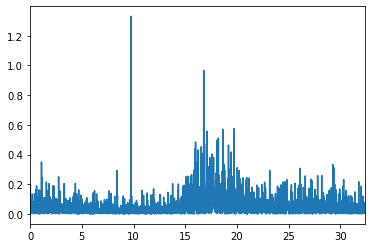

In [50]:
plt.plot(freq, PSD)
plt.xlim([0, 32.4]) # plot กราฟ ครึ่งนึง
plt.show()

C:\Users\Asus TUF\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


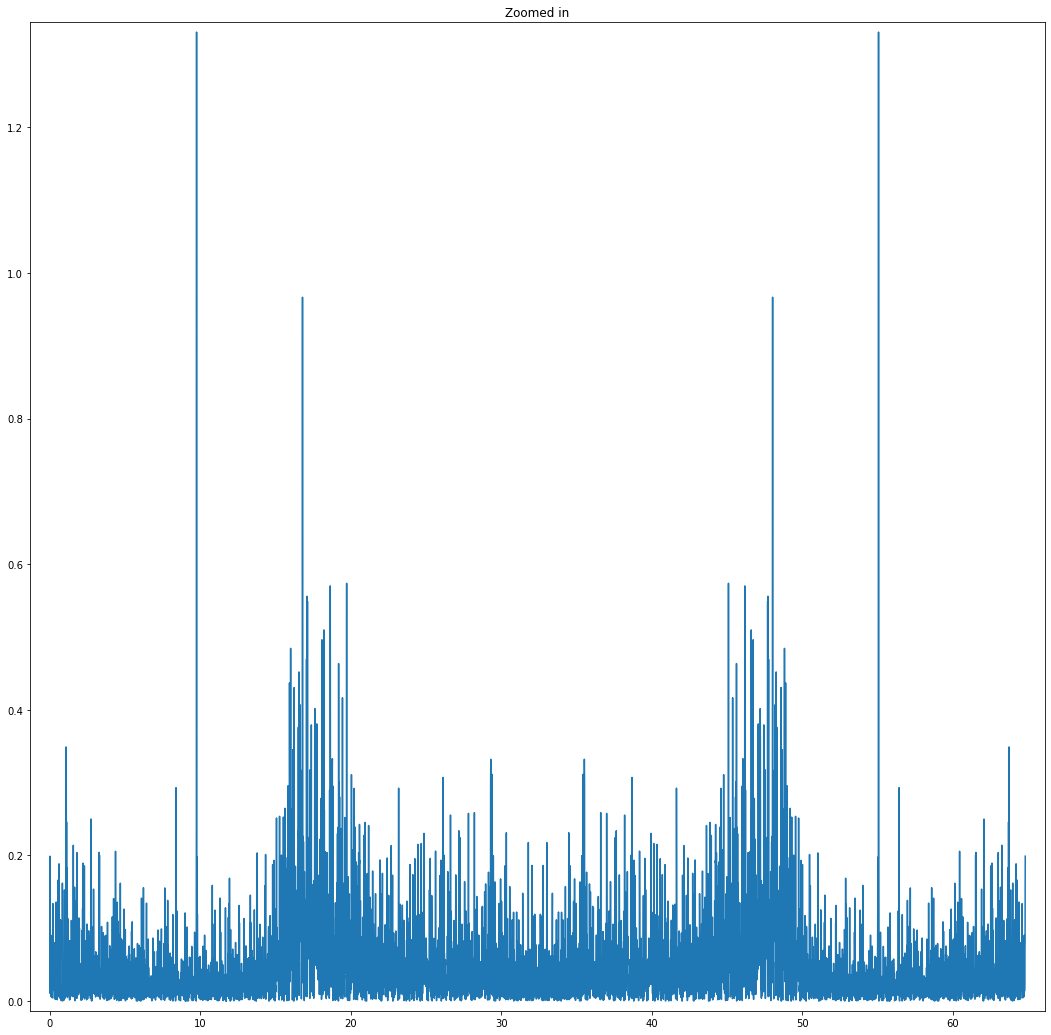

In [51]:
fig, ax3 = plt.subplots(1, 1, figsize=(40,40))
ax3 = plt.subplot(222)
ax3.margins(x=0.02, y=0.01)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(freq, PSD)
ax3.set_title('Zoomed in')

plt.show()

## Filter lowpass signal

In [52]:
sensor_data

array([-0.07419355, -0.02258064, -0.17096774, ..., -0.02258064,
       -0.30645161,  0.21612903])

In [53]:
nyq_rate = fs/2
width = 5/nyq_rate
ripple_db = 60
N, beta = kaiserord(ripple_db, width)
cutoff_hz = 32
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
filtered_x = lfilter(taps, 1.0, sensor_data)

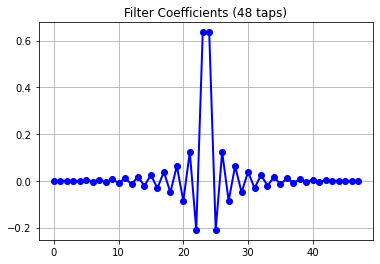

In [54]:
figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

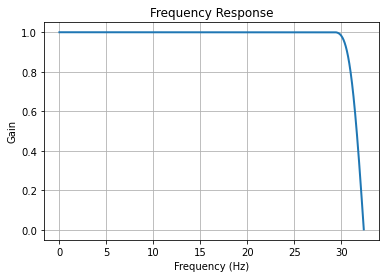

In [55]:
figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

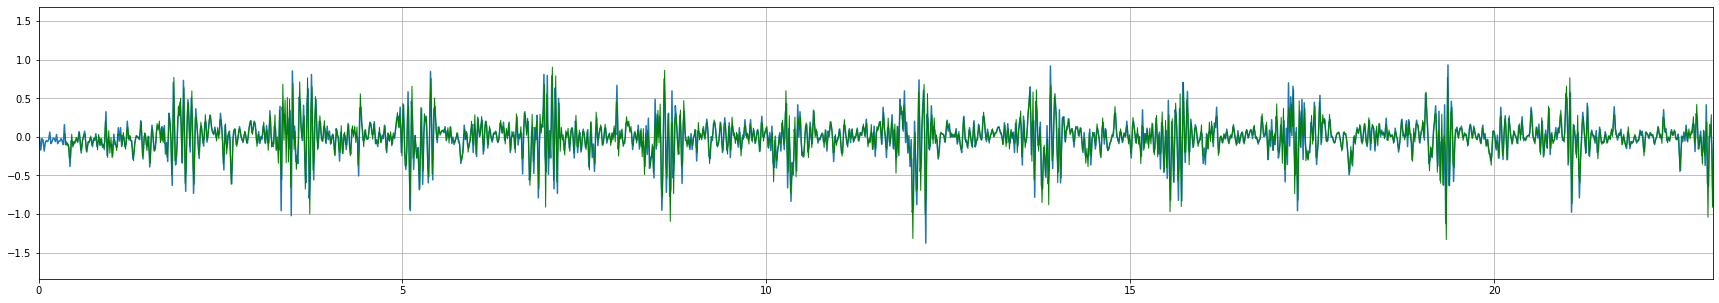

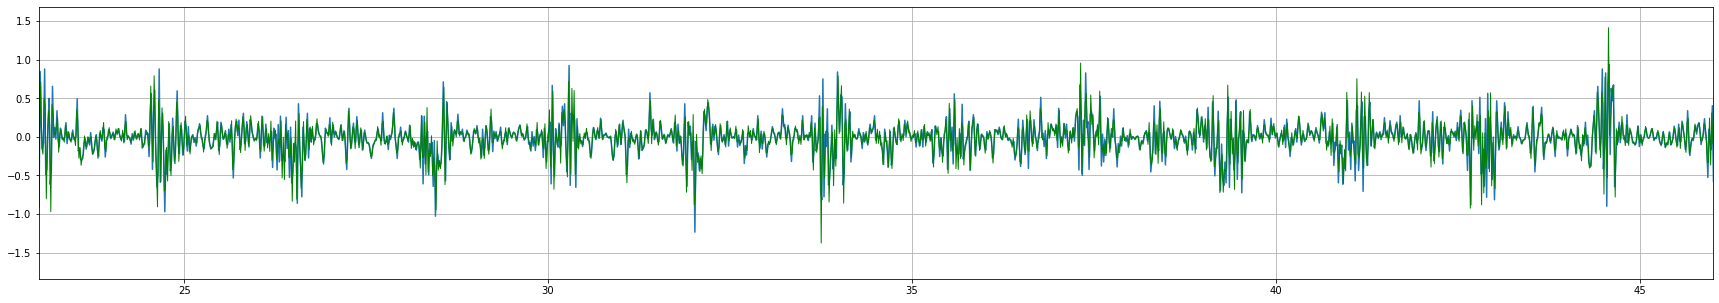

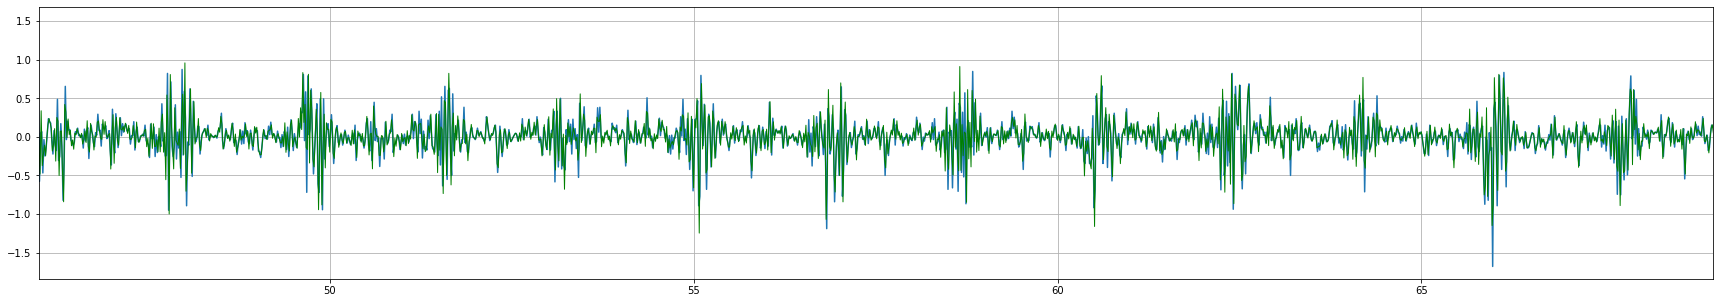

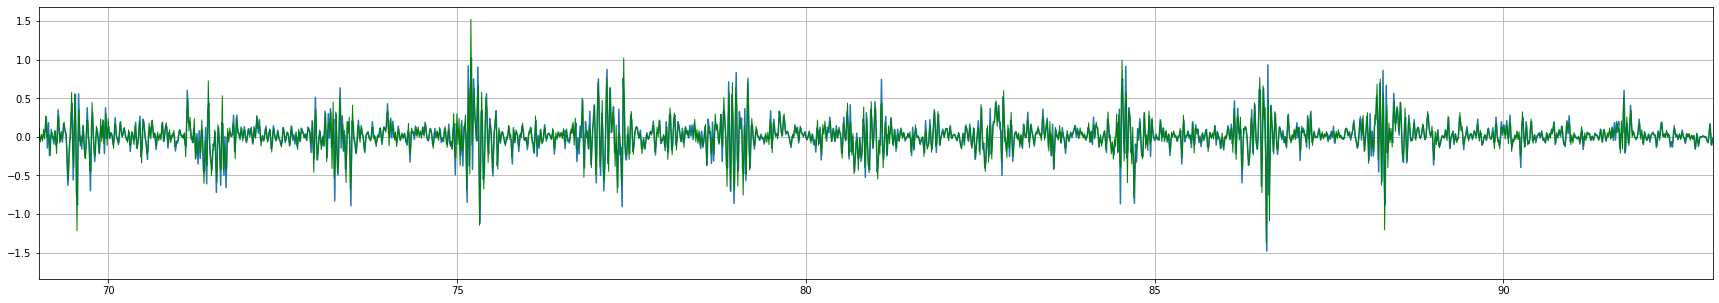

In [56]:
delay = 0.5 * (N-1) / fs
figure(1)
figure(1).set_size_inches(30, 5)
# Plot the original signal.
plot(time, sensor_data)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(time[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=1)
plt.xlim([0,23])
grid(True)

figure(2)
figure(2).set_size_inches(30, 5)
# Plot the original signal.
plot(time, sensor_data)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(time[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=1)
plt.xlim([23,46])
grid(True)

figure(3)
figure(3).set_size_inches(30, 5)
# Plot the original signal.
plot(time, sensor_data)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(time[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=1)
plt.xlim([46,69])
grid(True)

figure(4)
figure(4).set_size_inches(30, 5)
# Plot the original signal.
plot(time, sensor_data)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(time[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=1)
plt.xlim([69,93])
grid(True)

plt.show()

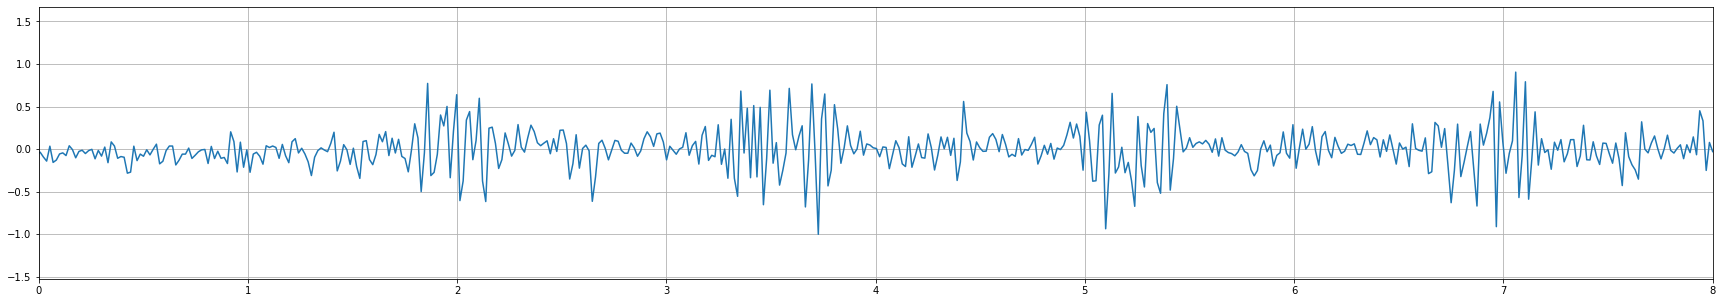

In [57]:
timeD = time-delay
figure(5)
figure(5).set_size_inches(30, 5)
plt.plot(timeD, filtered_x)
plt.xlim([0, 8])
grid(True)
plt.show()

## high pass filter

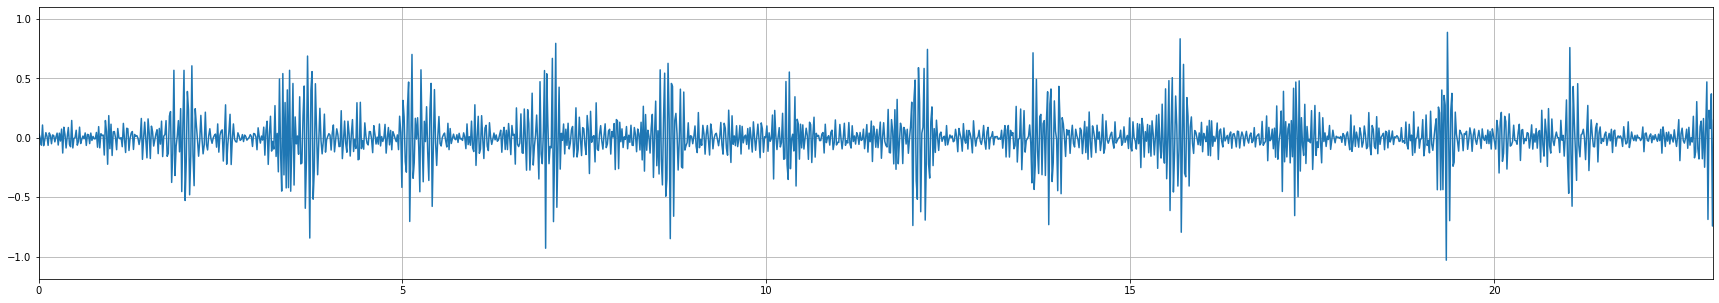

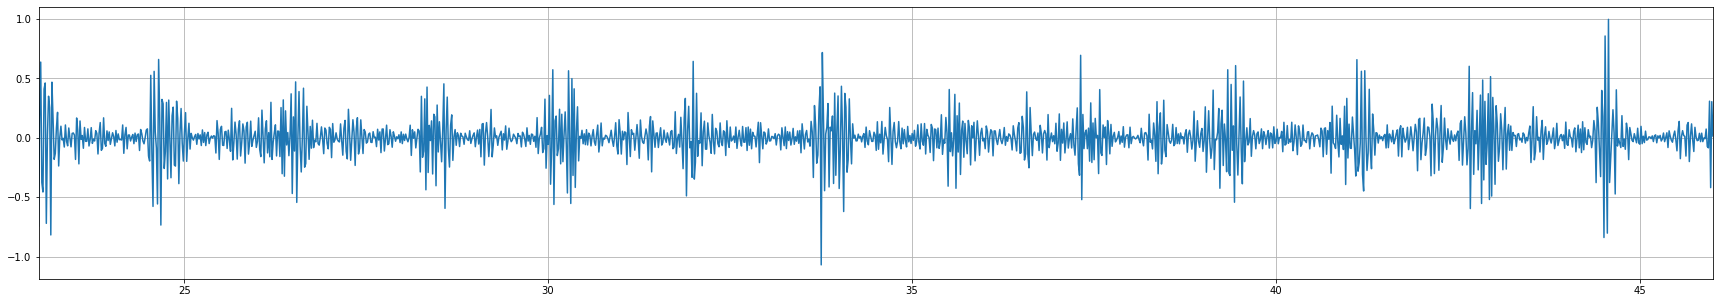

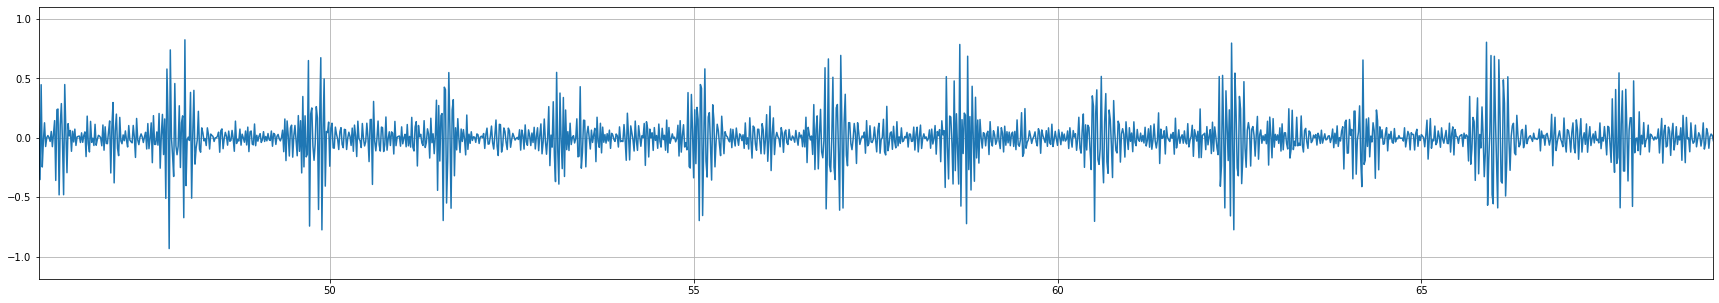

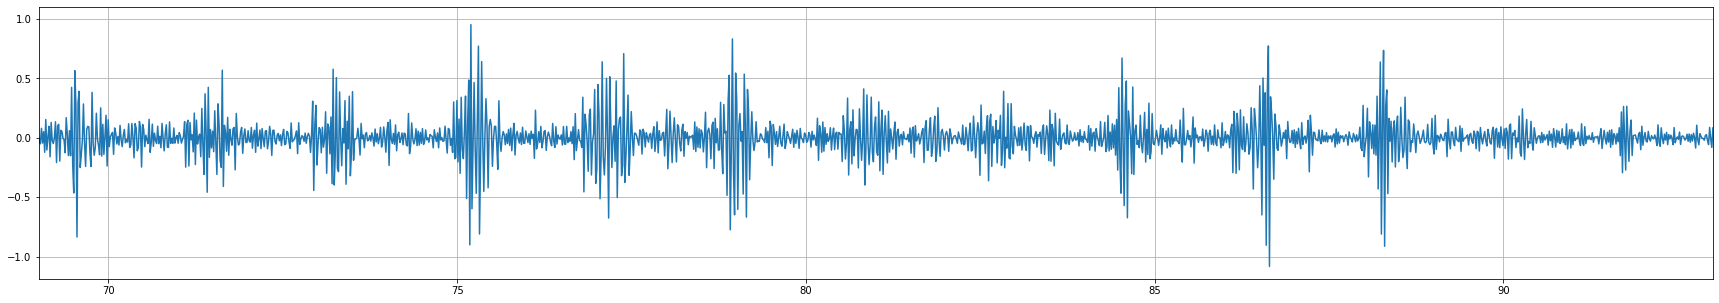

In [58]:
nyq = fs/2

high = 15/nyq
order = 10

b,a = scipy.signal.butter(order,high,'high', analog=False)
filtered_sig = scipy.signal.filtfilt(b, a, filtered_x, axis=0 )

figure(6)
figure(6).set_size_inches(30, 5)
plt.plot(timeD, filtered_sig)
plt.xlim([0, 23])
grid(True)

figure(7)
figure(7).set_size_inches(30, 5)
plt.plot(timeD, filtered_sig)
plt.xlim([23, 46])
grid(True)

figure(8)
figure(8).set_size_inches(30, 5)
plt.plot(timeD, filtered_sig)
plt.xlim([46, 69])
grid(True)

figure(9)
figure(9).set_size_inches(30, 5)
plt.plot(timeD, filtered_sig)
plt.xlim([69, 93])
grid(True)
plt.show()

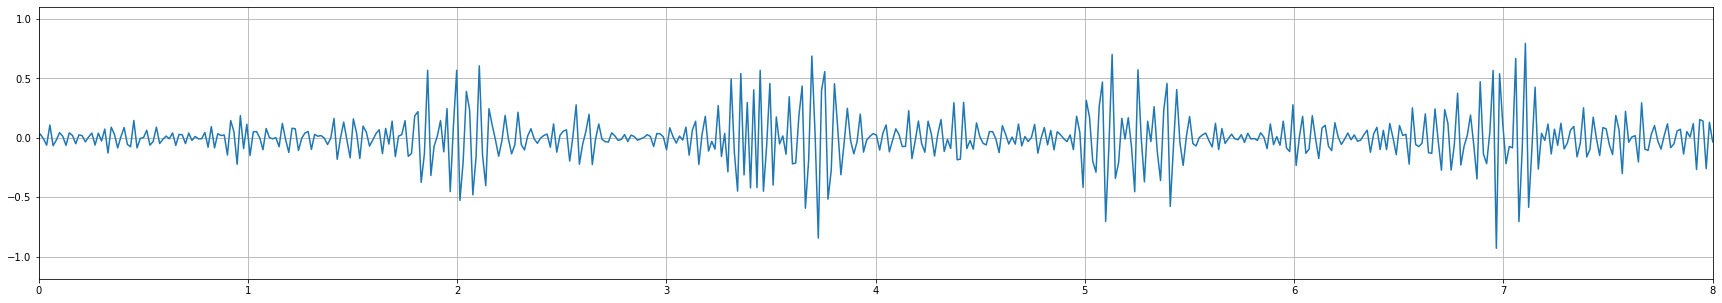

In [59]:
#high pass zoom in
figure(10)
figure(10).set_size_inches(30, 5)
plt.plot(timeD, filtered_sig)
plt.xlim([0, 8])
grid(True)
plt.show()

## ABS

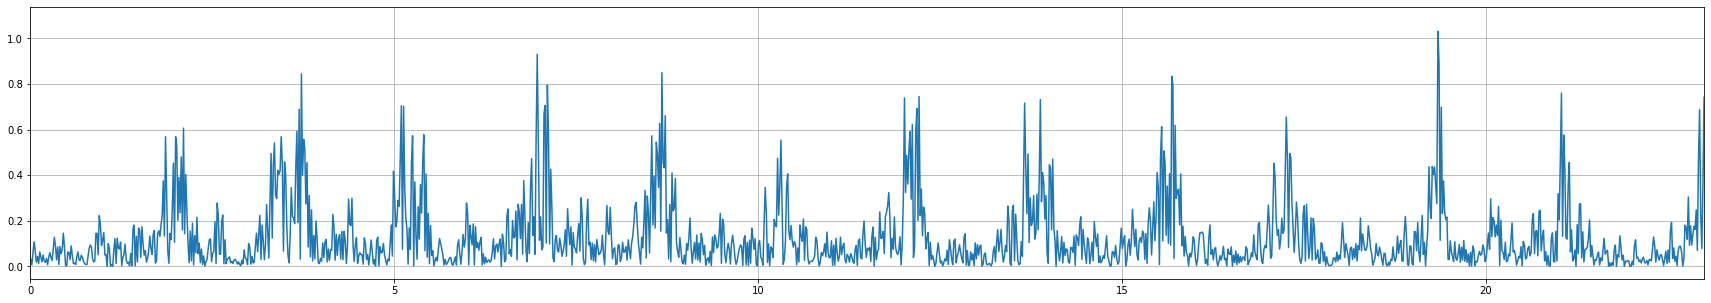

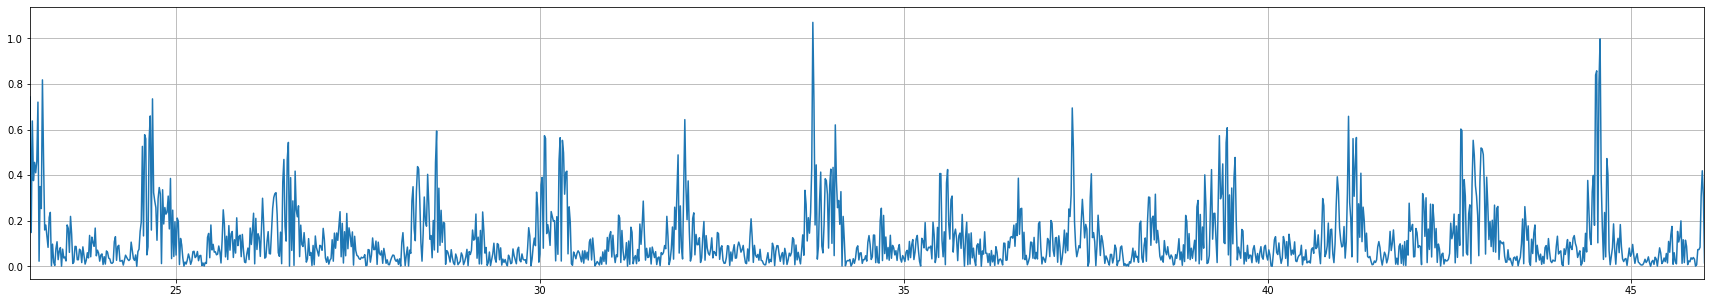

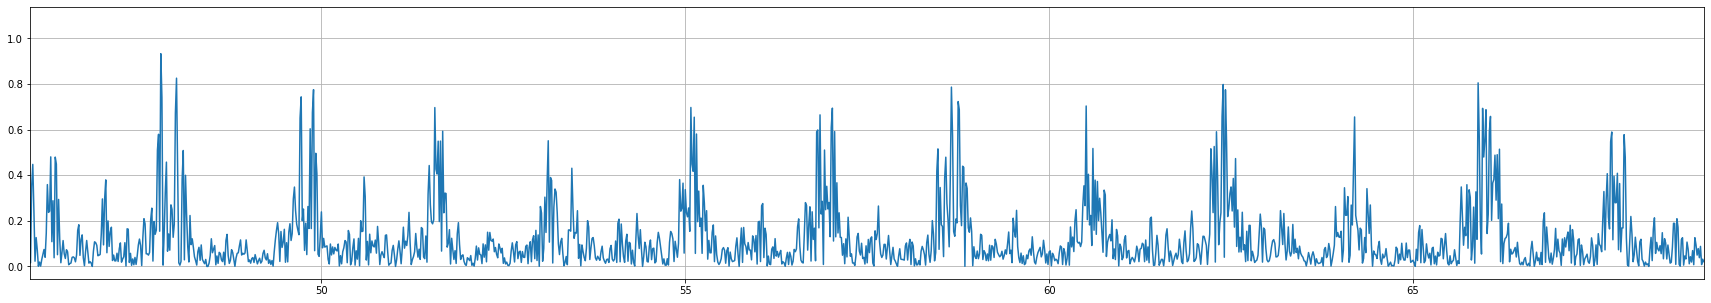

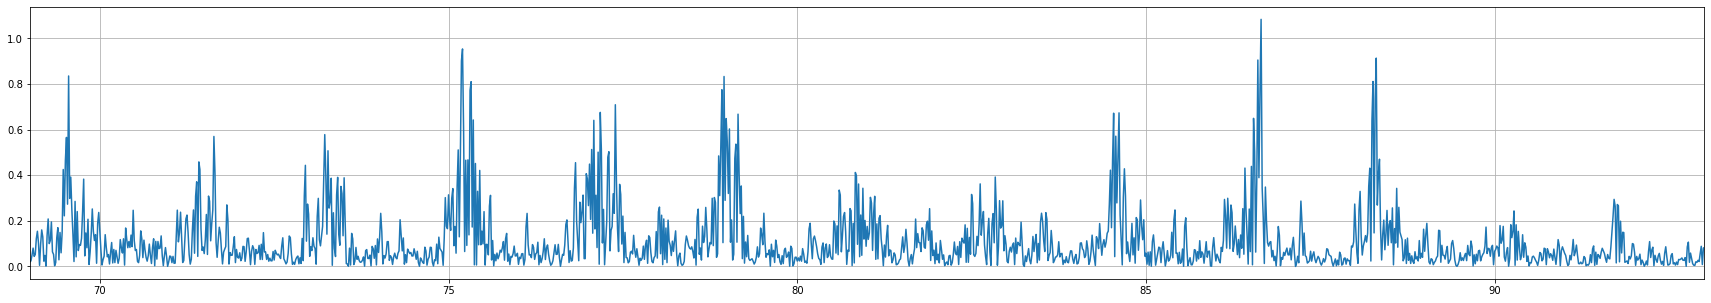

In [60]:
Pos_Fsig = np.abs(filtered_sig)

figure(11)
figure(11).set_size_inches(30, 5)
plt.plot(timeD, Pos_Fsig)
plt.xlim([0, 23])
grid(True)

figure(12)
figure(12).set_size_inches(30, 5)
plt.plot(timeD, Pos_Fsig)
plt.xlim([23, 46])
grid(True)

figure(13)
figure(13).set_size_inches(30, 5)
plt.plot(timeD, Pos_Fsig)
plt.xlim([46, 69])
grid(True)

figure(14)
figure(14).set_size_inches(30, 5)
plt.plot(timeD, Pos_Fsig)
plt.xlim([69, 93])
grid(True)

plt.show()

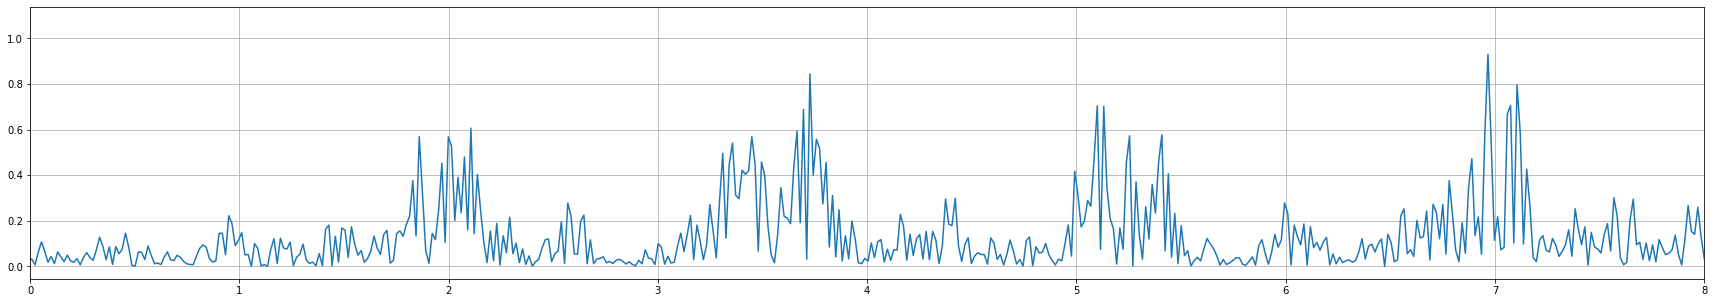

In [61]:
figure(15)
figure(15).set_size_inches(30, 5)
plt.plot(timeD, Pos_Fsig)
plt.xlim([0, 8])
grid(True)

plt.show()

## Low pass

In [62]:
print(Pos_Fsig.shape)
print(Pos_Fsig)

(6079,)
[2.20865345e-05 1.23357883e-04 1.86241884e-04 ... 3.77902641e-02
 2.59192531e-02 2.52886718e-04]


In [63]:
nyq_rate = fs/2
width = 5/nyq_rate
ripple_db = 60
N, beta = kaiserord(ripple_db, width)
cutoff_hz = 3
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
filtered_x2 = lfilter(taps, 1.0, Pos_Fsig)

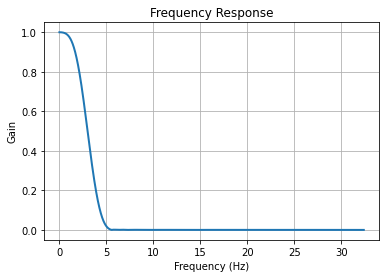

In [64]:
figure(16)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

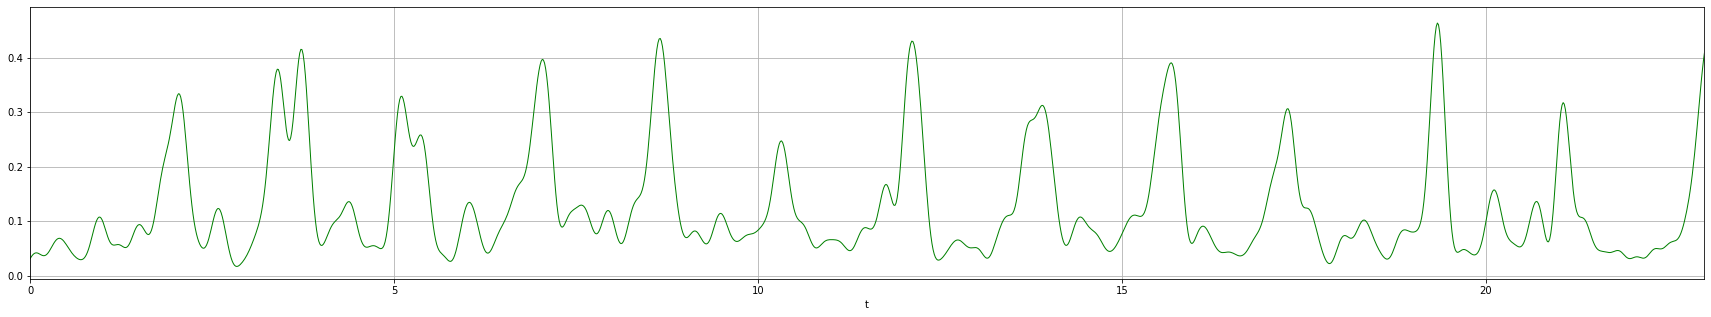

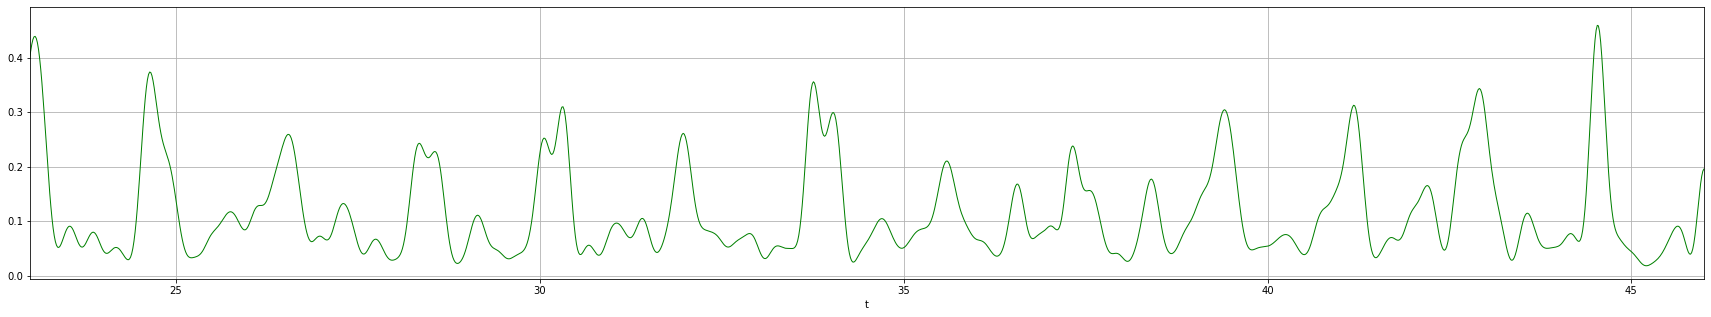

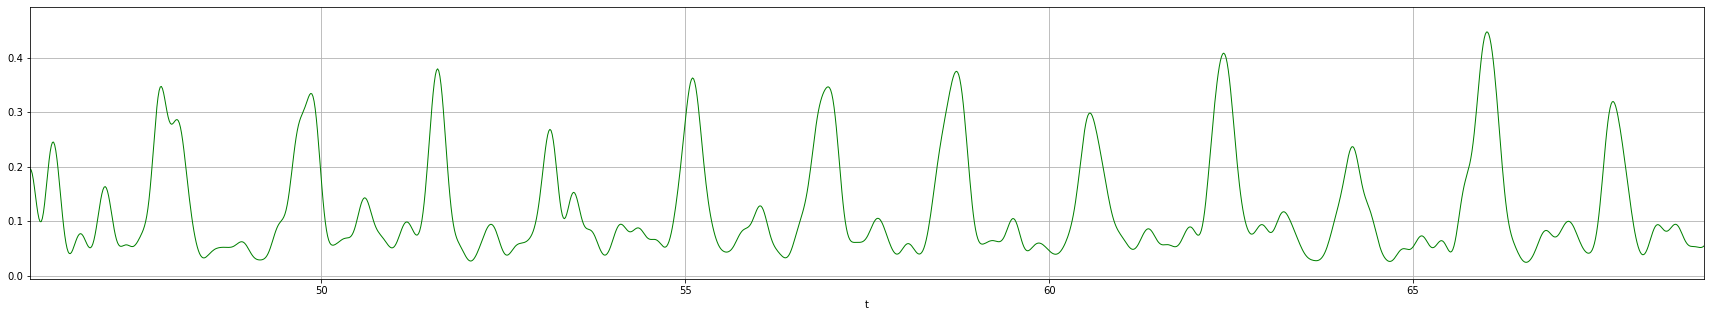

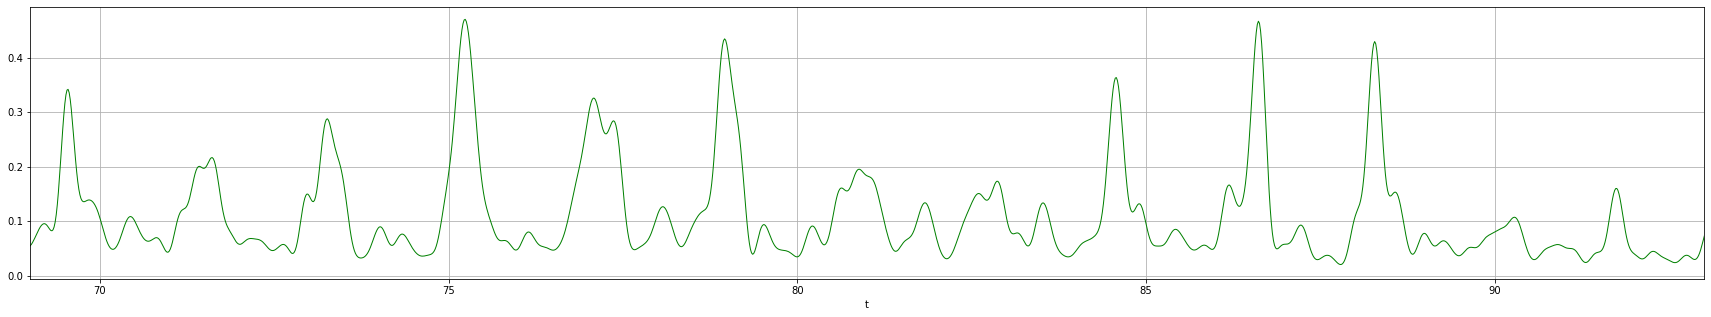

In [65]:
delay2 = 0.5 * (N-1) / fs
figure(17)
figure(17).set_size_inches(30, 5)
# Plot the original signal.
#plot(timeD, Pos_Fsig)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(timeD[N-1:]-delay2, filtered_x2[N-1:], 'g', linewidth=1)
plt.xlim([0,23])

xlabel('t')
grid(True)

figure(18)
figure(18).set_size_inches(30, 5)
# Plot the original signal.
#plot(timeD, Pos_Fsig)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(timeD[N-1:]-delay2, filtered_x2[N-1:], 'g', linewidth=1)
plt.xlim([23,46])

xlabel('t')
grid(True)

figure(19)
figure(19).set_size_inches(30, 5)
# Plot the original signal.
#plot(timeD, Pos_Fsig)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(timeD[N-1:]-delay2, filtered_x2[N-1:], 'g', linewidth=1)
plt.xlim([46,69])

xlabel('t')
grid(True)

figure(20)
figure(20).set_size_inches(30, 5)
# Plot the original signal.
#plot(timeD, Pos_Fsig)
# Plot the filtered signal, shifted to compensate for the phase delay.
#plot(time-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(timeD[N-1:]-delay2, filtered_x2[N-1:], 'g', linewidth=1)
plt.xlim([69,93])

xlabel('t')
grid(True)

show()

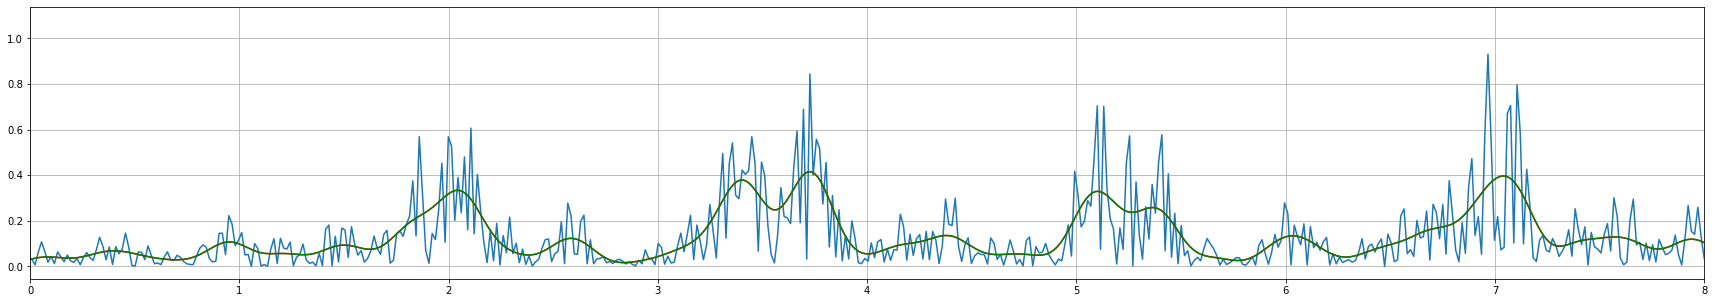

In [66]:
timeD2 = timeD-delay2
figure(21)
figure(21).set_size_inches(30, 5)
# Plot the original signal.
plot(timeD, Pos_Fsig)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(timeD2, filtered_x2, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(timeD2[N-1:], filtered_x2[N-1:], 'g', linewidth=1.5)
plt.xlim([0,8])
grid(True)
plt.show()

## Map with gyro

In [67]:
data = pd.read_csv('/Users/Asus TUF/Desktop/EMG2.csv')
gyro_data = data[['gyro']]    #อ่านข้อมูลที่หัวคอลัมชื่อ data2
gyro_data = np.array(gyro_data)
gyro_data = np.squeeze(gyro_data, axis=1) #ลดไดเมนชั่นของเอร

In [68]:
gyro_data

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [69]:
with np.printoptions(edgeitems=150):
    print(gyro_data)

[   1    1    1    1    1    2    2    1    1    1    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   -1
   -1   -1   -1    0    0    0    0    0    0    1    1    1    1    1
    1    1    1    1    1    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1    1    1    0    0    0   -1   -4   -9
  -16  -25  -32  -40  -48  -57  -69  -82  -94 -110 -117 -117 -117 -126
  121  122 -126 -127  126  121  122 -124 -123  124  122  126  123  121
  114  111  115  117  115  107  111  126 -117 -113 -115 -107  -88  -66
  -60  -39   -3   85  110  118  121  122 -123 -115 ...   54   54   53   54
   54   54   54   54   55   55   55   55   55   55   55   54   53   53
    2    2    1    1    1    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   -1   -1   -1   -1
  

In [70]:
filtered_x2.shape

(6079,)

In [71]:
timeD2.shape

(6079,)

In [72]:
T = np.arange(0,6079,1)
print(T)

[   0    1    2 ... 6076 6077 6078]


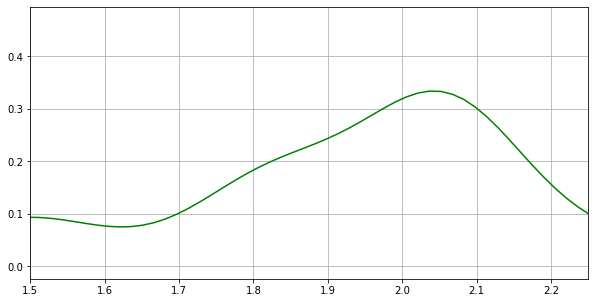

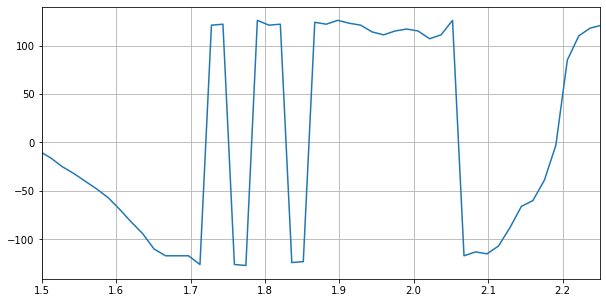

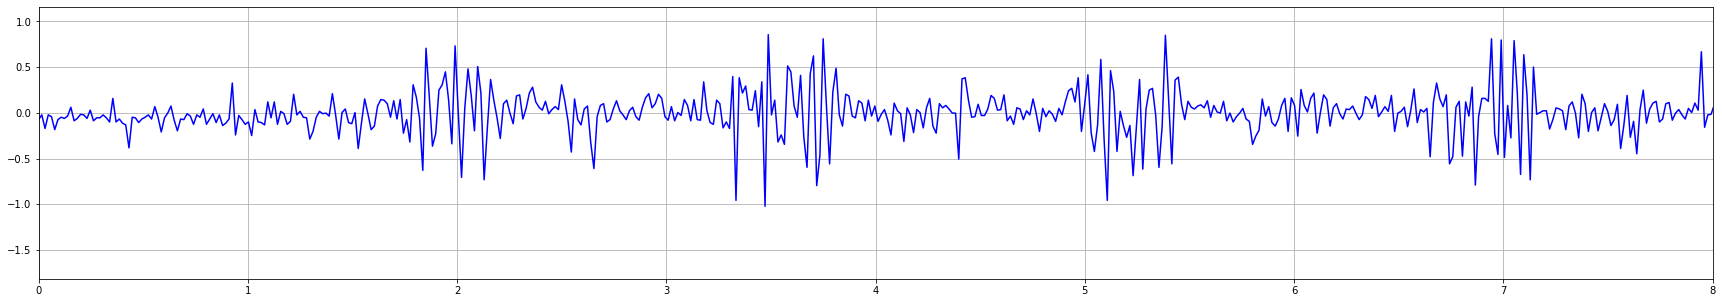

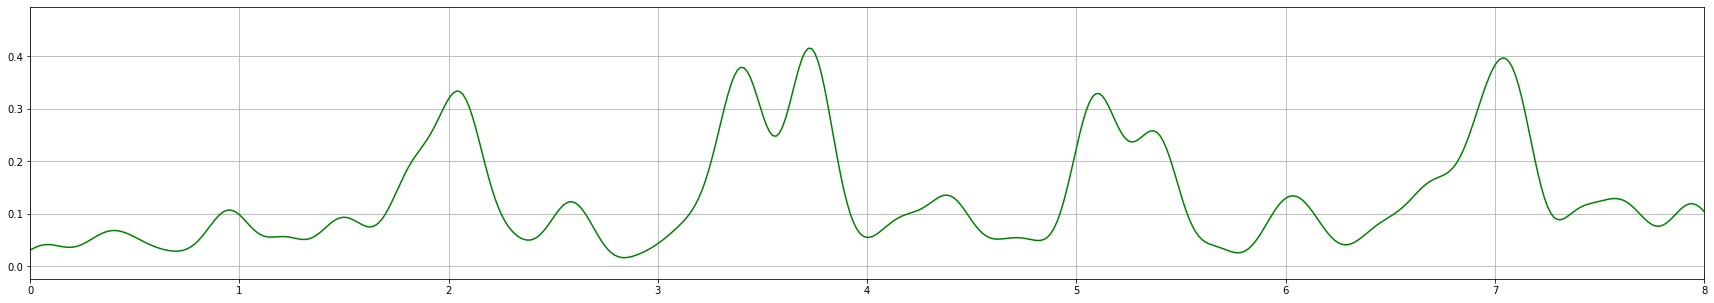

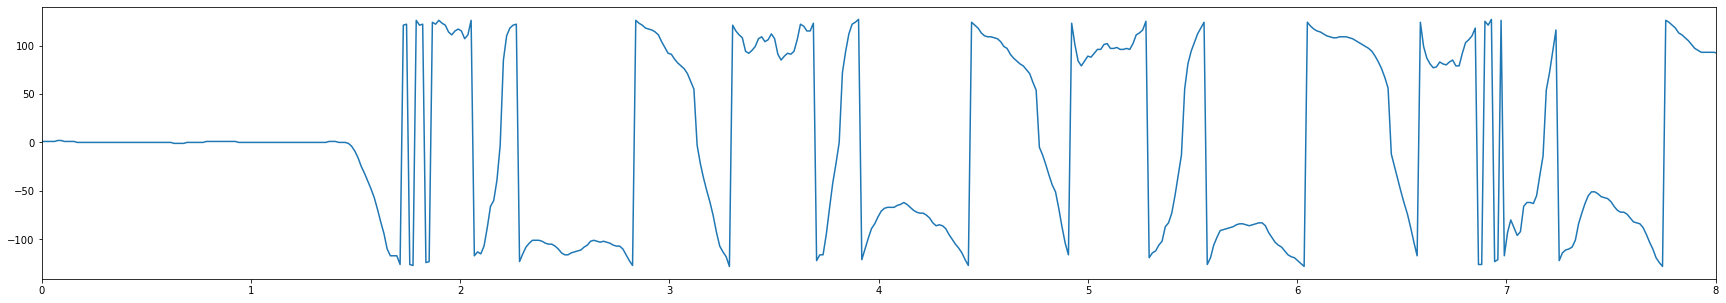

In [78]:
figure(22)
figure(22).set_size_inches(10, 5)
plt.plot(timeD2, filtered_x2, 'g', linewidth=1.5)
plt.xlim([1.5, 2.25])
grid(True)

figure(23)
figure(23).set_size_inches(10, 5)
plt.plot(time, gyro_data)
plt.xlim([1.5, 2.25])
grid(True)

figure(24)
figure(24).set_size_inches(30, 5)
plt.plot(time, sensor_data, 'b', linewidth=1.5)
plt.xlim([0, 8])
grid(True)

figure(25)
figure(25).set_size_inches(30, 5)
plt.plot(timeD2, filtered_x2, 'g', linewidth=1.5)
plt.xlim([0, 8])
grid(True)

figure(26)
figure(26).set_size_inches(30, 5)
plt.plot(time, gyro_data)
plt.xlim([0, 8])


plt.show()

In [79]:
for Q in filtered_x2:
    print(Q)

3.191787927270468e-09
2.0754801619077504e-08
4.271148692245203e-08
4.2152977984839725e-08
-3.641260336641632e-08
-2.0526901036599427e-07
-4.600522993791805e-07
-9.924230057796527e-07
-1.8613126683615303e-06
-2.9198239195612424e-06
-4.2577961193484305e-06
-6.133355803533802e-06
-8.361552857623133e-06
-1.0574413940977247e-05
-1.2972221072501169e-05
-1.5739968351692505e-05
-1.8153021578092507e-05
-1.9597892658664504e-05
-2.054158184275743e-05
-2.0871062977971065e-05
-1.882285878598955e-05
-1.331061011439641e-05
-5.027199977668693e-06
5.9274772837713085e-06
1.891366103280956e-05
2.7518114438555437e-05
4.142671530790054e-05
6.0919906878602084e-05
7.103202003365318e-05
6.382560213147622e-05
4.803850443520627e-05
2.475468746289572e-05
2.373503636371292e-05
6.827237047055194e-05
0.00020177609599527924
0.0004893709978740035
0.0009936185676183529
0.0017906533471540769
0.002957559263711937
0.0045528372945080435
0.006629155218149702
0.009203487821938238
0.012249891803263635
0.01570678006651627
0.0

0.0366621341345008
0.03714800394419218
0.037623158931222096
0.03815340618609727
0.03885204856728308
0.03994947767700355
0.04170721963220631
0.044320241405129565
0.048171254960125795
0.0535287506739952
0.06049020140116944
0.06898347809050759
0.07880511459662667
0.08981352737841133
0.10160773546014493
0.11395883720410219
0.12651253001007984
0.1392599762803025
0.1521348679406755
0.16516376135866653
0.17876784887863278
0.19319189001280218
0.2089921875156921
0.22645011534397785
0.2459528404160857
0.2675336254078311
0.29110645552327463
0.3161814878945326
0.34212924334612416
0.3680715119734411
0.39303292796075107
0.4158987280308928
0.43569599739773385
0.4515607176576758
0.46282727207999
0.4691505018054183
0.4703467628622635
0.46647830931705275
0.45787175349172793
0.4449590830746958
0.42833287283561244
0.40860456502128006
0.386457021606755
0.3625946492461376
0.33765606110897917
0.3122588133442439
0.287032070221133
0.26252252771812745
0.2392153419882799
0.21754191350381988
0.19787974743235615
0